# Objective
Now we have data that was cleaned and recovered (2 records) in `processed.cleveland-cleansed.data` file.

In this notebook, we are going to validate and scrutinize the data again for model building.

In [20]:
import matplotlib.pyplot as plt
# All required libraries.
import pandas as pd
import seaborn as sns

import models.uci_heart_disease_dataset as uci

In [21]:
df = pd.read_csv(uci.UCIHeartDiseaseDataFile.cleveland_cleansed, names = uci.get_standard_features())
df.head(5)

,Age,Gender,Chest Pain,BP Systolic,Cholesterol,Blood Sugar,Rest ECG,Exe. Max Heartrate,Exe. Induced Angina,Exe. ST Depression,Exe. ST Segment Slope,Major Vessels,Thalassemia,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [22]:
# Let's see the data details.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    299 non-null    float64
 1   Gender                 299 non-null    float64
 2   Chest Pain             299 non-null    float64
 3   BP Systolic            299 non-null    float64
 4   Cholesterol            299 non-null    float64
 5   Blood Sugar            299 non-null    float64
 6   Rest ECG               299 non-null    float64
 7   Exe. Max Heartrate     299 non-null    float64
 8   Exe. Induced Angina    299 non-null    float64
 9   Exe. ST Depression     299 non-null    float64
 10  Exe. ST Segment Slope  299 non-null    float64
 11  Major Vessels          299 non-null    float64
 12  Thalassemia            299 non-null    float64
 13  Target                 299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.8 KB


In [23]:
# Based on data-dictionary the following variables are categorical variables converted to integer.
# This means, they can be converted to integers from float.
df[uci.UCIHeartDiseaseData.age] = df[uci.UCIHeartDiseaseData.age].astype('int')
df[uci.UCIHeartDiseaseData.gender] = df[uci.UCIHeartDiseaseData.gender].astype('int')
df[uci.UCIHeartDiseaseData.chest_pain] = df[uci.UCIHeartDiseaseData.chest_pain].astype('int')
df[uci.UCIHeartDiseaseData.blood_sugar] = df[uci.UCIHeartDiseaseData.blood_sugar].astype('int')
df[uci.UCIHeartDiseaseData.rest_ecg] = df[uci.UCIHeartDiseaseData.rest_ecg].astype('int')
df[uci.UCIHeartDiseaseData.exe_induced_angina] = df[uci.UCIHeartDiseaseData.exe_induced_angina].astype('int')
df[uci.UCIHeartDiseaseData.exe_st_segment_slope] = df[uci.UCIHeartDiseaseData.exe_st_segment_slope].astype('int')
df[uci.UCIHeartDiseaseData.major_vessels] = df[uci.UCIHeartDiseaseData.major_vessels].astype('int')
df[uci.UCIHeartDiseaseData.thalassemia] = df[uci.UCIHeartDiseaseData.thalassemia].astype('int')
df[uci.UCIHeartDiseaseData.target] = df[uci.UCIHeartDiseaseData.target].astype('int')

In [24]:
# Let's investigate the other float variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    299 non-null    int64  
 1   Gender                 299 non-null    int64  
 2   Chest Pain             299 non-null    int64  
 3   BP Systolic            299 non-null    float64
 4   Cholesterol            299 non-null    float64
 5   Blood Sugar            299 non-null    int64  
 6   Rest ECG               299 non-null    int64  
 7   Exe. Max Heartrate     299 non-null    float64
 8   Exe. Induced Angina    299 non-null    int64  
 9   Exe. ST Depression     299 non-null    float64
 10  Exe. ST Segment Slope  299 non-null    int64  
 11  Major Vessels          299 non-null    int64  
 12  Thalassemia            299 non-null    int64  
 13  Target                 299 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 32.8 KB


In [25]:
df[uci.UCIHeartDiseaseData.bp_systolic].value_counts()

BP Systolic
120.0    38
130.0    36
140.0    32
110.0    19
150.0    18
160.0    11
138.0    10
128.0    10
125.0    10
112.0     9
132.0     7
118.0     7
124.0     6
108.0     6
135.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
126.0     3
136.0     3
115.0     3
180.0     3
142.0     3
105.0     3
102.0     2
146.0     2
144.0     2
148.0     2
178.0     2
94.0      2
165.0     1
123.0     1
114.0     1
154.0     1
156.0     1
106.0     1
155.0     1
172.0     1
200.0     1
101.0     1
129.0     1
192.0     1
158.0     1
104.0     1
174.0     1
117.0     1
164.0     1
Name: count, dtype: int64

In [26]:
# Yes, systolic won't have floating point. So convert to int.
df[uci.UCIHeartDiseaseData.bp_systolic] = df[uci.UCIHeartDiseaseData.bp_systolic].astype('int')

In [27]:
# Logically cholesterol reading can be in decimals. So, we let it be though all data are integers.
df[uci.UCIHeartDiseaseData.cholesterol].value_counts()

Cholesterol
197.0    6
234.0    6
269.0    5
204.0    5
212.0    5
        ..
175.0    1
417.0    1
281.0    1
174.0    1
100.0    1
Name: count, Length: 153, dtype: int64

In [28]:
df[uci.UCIHeartDiseaseData.exe_max_heartrate].value_counts()

Exe. Max Heartrate
162.0    11
160.0     9
163.0     9
152.0     8
150.0     7
         ..
128.0     1
188.0     1
113.0     1
99.0      1
98.0      1
Name: count, Length: 92, dtype: int64

In [29]:
# Heart rate won't have decimals.
df[uci.UCIHeartDiseaseData.exe_max_heartrate] = df[uci.UCIHeartDiseaseData.exe_max_heartrate].astype('int')

In [30]:
df[uci.UCIHeartDiseaseData.exe_st_depression].value_counts()

Exe. ST Depression
0.0    96
1.2    17
0.6    14
1.4    13
0.8    13
1.0    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     8
1.5     7
0.1     6
2.8     6
2.6     6
1.9     5
0.5     5
3.0     5
3.6     4
2.2     4
3.4     3
0.9     3
2.4     3
0.3     3
4.0     3
1.1     2
4.2     2
2.3     2
2.5     2
3.2     2
5.6     1
2.9     1
6.2     1
2.1     1
1.3     1
3.1     1
3.8     1
0.7     1
3.5     1
4.4     1
Name: count, dtype: int64

In [31]:
df.head(5)

,Age,Gender,Chest Pain,BP Systolic,Cholesterol,Blood Sugar,Rest ECG,Exe. Max Heartrate,Exe. Induced Angina,Exe. ST Depression,Exe. ST Segment Slope,Major Vessels,Thalassemia,Target
0,63,1,1,145,233.0,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286.0,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229.0,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250.0,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204.0,0,2,172,0,1.4,1,0,3,0


In [32]:
# Check for duplicate records.
duplicate = df[df.duplicated()]
duplicate

,Age,Gender,Chest Pain,BP Systolic,Cholesterol,Blood Sugar,Rest ECG,Exe. Max Heartrate,Exe. Induced Angina,Exe. ST Depression,Exe. ST Segment Slope,Major Vessels,Thalassemia,Target


In [33]:
df[uci.UCIHeartDiseaseData.target].value_counts()

Target
0    160
1    139
Name: count, dtype: int64

In [34]:
# Normalized value counts - result shows, class with '1' has slightly more records.
df[uci.UCIHeartDiseaseData.target].value_counts(normalize=True)

Target
0    0.535117
1    0.464883
Name: proportion, dtype: float64

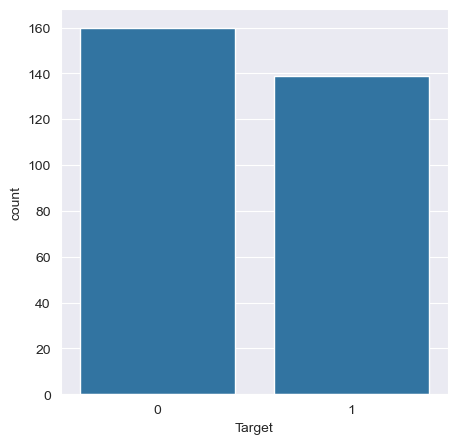

In [35]:
plt.subplots(figsize=(5,5))
sns.countplot(x=df[uci.UCIHeartDiseaseData.target]);

In [36]:
# Save as 'processed.cleveland-preprocessed.data' file - ready for model building.
df.to_csv(uci.UCIHeartDiseaseDataFile.cleveland_preprocessed, header=False, index=False)